### Figure 4 Cell Chat Analysis 

Note: Figure 4B, 4C, 4D are all generated here 

In [1]:
library(CellChat)
library(patchwork)
options(stringsAsFactors = FALSE)
library(reticulate)
library(NMF)
library(ggalluvial)
library(anndata)
library(Matrix)

Loading required package: dplyr


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.3.3"

Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Loading required package: ggplot2

Warning message:
"package 'patchwork' was built under R version 4.3.3"
Warning message:
"package 'reticulate' was built under R version 4.3.3"
Warning message:
"package 'NMF' was built under R version 4.3.3"
Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

Warning message:
"package 'cluster' was built

In [2]:
lymphoid_cells = c("NK cells", "CD4 T cells", "CD8 T cells", "T cells proliferating", "B cells", "Plasma cells", "Plasmacytoid DCs")
myeloid_cells = c("Classical monocytes", "Non classical monocytes", "Alveolar macrophages", "Monocyte derived Mφ", "Alveolar Mφ proliferating", "Alveolar Mφ MT-positive", "Interstitial Mφ perivascular", "Alveolar Mφ CCL3+", "DC1", "DC2", "Migratory DCs", "Mast cells")
fibroblast_cells = c("Adventitial fibroblasts", "Alveolar fibroblasts", "Peribronchial fibroblasts", "Subpleural fibroblasts", "Myofibroblasts", "Fibromyocytes")

ear_ad <- read_h5ad("../data/processed_early.h5ad")
print(ear_ad)
# access count data matrix
ear_counts <- t(as.matrix(ear_ad$X))
# normalize the count data if the normalized data is not available in the .h5ad file
library.size <- Matrix::colSums(ear_counts)
data.input <- as(log1p(Matrix::t(Matrix::t(ear_counts)/library.size) * 10000), "dgCMatrix")
# access meta data
ear_meta <- ear_ad$obs
ear_meta$labels <- ear_meta[["leiden_res_20.00_celltype"]]

ear_cc <- createCellChat(object = data.input, meta = ear_meta, group.by = "leiden_res_20.00_celltype")

print('Created Early CellChat object.')

AnnData object with n_obs x n_vars = 10000 x 36498
    obs: 'tumor_stage', 'disease', 'sample', 'project', 'source', 'tissue', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_res_0.10', 'leiden_res_1.00', 'leiden_res_5.00', 'leiden_res_10.00', 'leiden_res_20.00', 'leiden_res_0.10_celltype', 'leiden_res_1.00_celltype', 'leiden_res_5.00_celltype', 'leiden_res_10.00_celltype', 'leiden_res_20.00_celltype', 'HALLMARK_OXIDATIVE_PHOSPHORYLATION', 'HALLMARK_ANGIOGENESIS', 'HALLMARK_ADIPOGENESIS', 'HALLMARK_KRAS_SIGNALING_DN', 'HALLMARK_TNFA_SIGNALING_VIA_NFKB', 'HALLMARK_SPERMATOGENESIS', 'HALLMARK_ESTROGEN_RESPONSE_EARLY', 'HALLMARK_PEROXISOME', 'HALLMARK_HYPOXIA', 'REACTOME_SIGNALING_BY_EGFR_IN_CANCER', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'HALLMARK_INFLAMMATORY_RESPONSE', 'HALLMARK_MYC_TARGETS_V2', 'HALLMARK_PROTEIN_SECRETION', 'HALLMARK_UV_RESPONSE_UP', 'HALLMARK_APOPTOSIS', 'HALLMARK_XENOBIOTIC_METABOLISM', 'HALLMARK_KRAS_SIGNALING_UP'

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.7 GiB"


[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = data.input, meta = ear_meta, group.by = "leiden_res_20.00_celltype"):
"The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`!"


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Adventitial fibroblasts, Alveolar M<U+03C6> MT-positive, Alveolar macrophages, B cells, CD4 T cells, CD8 T cells, Classical monocytes, DC2, Mast cells, Migratory DCs, Monocyte derived M<U+03C6>, NK cells, Non classical monocytes, Peribronchial fibroblasts, Plasma cells, Plasmacytoid DCs, Subpleural fibroblasts, T cells proliferating 
[1] "Created Early CellChat object."


In [3]:
nc_ad <- read_h5ad("../data/processed_non-cancer.h5ad")
# access count data matrix
nc_counts <- t(as.matrix(nc_ad$X))
# normalize the count data if the normalized data is not available in the .h5ad file
library.size <- Matrix::colSums(nc_counts)
data.input <- as(log1p(Matrix::t(Matrix::t(nc_counts)/library.size) * 10000), "dgCMatrix")
# access meta data
nc_meta <- nc_ad$obs
nc_meta$labels <- nc_meta[["leiden_res_20.00_celltype"]]

nc_cc <- createCellChat(object = data.input, meta = nc_meta, group.by = "leiden_res_20.00_celltype")

print('Created Non-cancer CellChat object.')

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.7 GiB"


[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = data.input, meta = nc_meta, group.by = "leiden_res_20.00_celltype"):
"The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`!"


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Adventitial fibroblasts, Alveolar M<U+03C6> MT-positive, Alveolar macrophages, B cells, CD4 T cells, CD8 T cells, Classical monocytes, DC2, Mast cells, Migratory DCs, Monocyte derived M<U+03C6>, NK cells, Non classical monocytes, Peribronchial fibroblasts, Plasma cells, Plasmacytoid DCs, T cells proliferating 
[1] "Created Non-cancer CellChat object."


In [4]:
adv_ad <- read_h5ad("../data/processed_advanced.h5ad")
# access count data matrix
adv_counts <- t(as.matrix(adv_ad$X))
# normalize the count data if the normalized data is not available in the .h5ad file
library.size <- Matrix::colSums(adv_counts)
data.input <- as(log1p(Matrix::t(Matrix::t(adv_counts)/library.size) * 10000), "dgCMatrix")
# access meta data
adv_meta <- adv_ad$obs
adv_meta$labels <- adv_meta[["leiden_res_20.00_celltype"]]

adv_cc <- createCellChat(object = data.input, meta = adv_meta, group.by = "leiden_res_20.00_celltype")

print('Created Advanced CellChat object.')

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 2.7 GiB"


[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = data.input, meta = adv_meta, group.by = "leiden_res_20.00_celltype"):
"The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`!"


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Adventitial fibroblasts, Alveolar M<U+03C6> MT-positive, Alveolar macrophages, B cells, CD4 T cells, CD8 T cells, Classical monocytes, DC2, Mast cells, Migratory DCs, Monocyte derived M<U+03C6>, NK cells, Non classical monocytes, Peribronchial fibroblasts, Plasma cells, Plasmacytoid DCs, Subpleural fibroblasts, T cells proliferating 
[1] "Created Advanced CellChat object."


In [5]:
CellChatDB <- CellChatDB.human
CellChatDB.use <- subsetDB(CellChatDB)
ear_cc@DB <- CellChatDB.use
nc_cc@DB <- CellChatDB.use
adv_cc@DB <- CellChatDB.use

In [6]:
future::plan("multisession", workers = 4) # do parallel

ear_cc <- subsetData(ear_cc) # This step is necessary even if using the whole database
ear_cc <- identifyOverExpressedGenes(ear_cc)
ear_cc <- identifyOverExpressedInteractions(ear_cc)
ear_cc <- projectData(ear_cc, PPI.human)

nc_cc <- subsetData(nc_cc) # This step is necessary even if using the whole database
nc_cc <- identifyOverExpressedGenes(nc_cc)
nc_cc <- identifyOverExpressedInteractions(nc_cc)
nc_cc <- projectData(nc_cc, PPI.human)

adv_cc <- subsetData(adv_cc) # This step is necessary even if using the whole database
adv_cc <- identifyOverExpressedGenes(adv_cc)
adv_cc <- identifyOverExpressedInteractions(adv_cc)
adv_cc <- projectData(adv_cc, PPI.human)

The number of highly variable ligand-receptor pairs used for signaling inference is 1805 
The number of highly variable ligand-receptor pairs used for signaling inference is 1758 
The number of highly variable ligand-receptor pairs used for signaling inference is 1803 


In [7]:
options(future.globals.maxSize = 2 * 1024^3)

ear_cc <- computeCommunProb(ear_cc, type = "triMean")
nc_cc <- computeCommunProb(nc_cc, type = "triMean")
adv_cc <- computeCommunProb(adv_cc, type = "triMean")

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-07-20 00:11:26.398426]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-07-20 00:16:45.587686]"
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-07-20 00:16:48.11152]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-07-20 00:21:16.598518]"
triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2025-07-20 00:21:19.13469]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2025-07-20 00:24:26.313151]"


ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

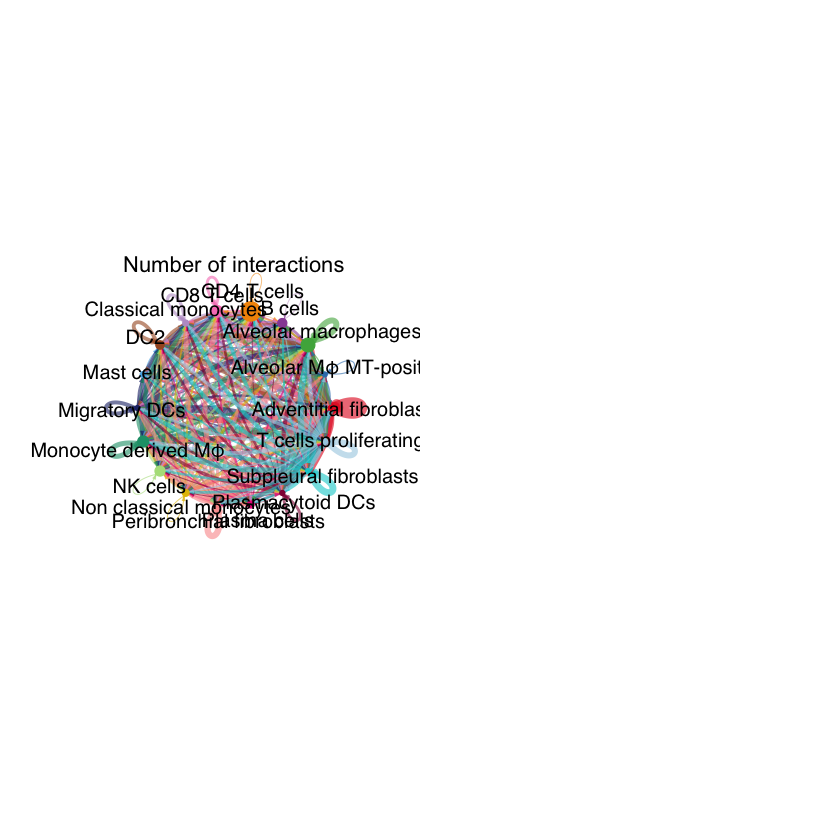

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

plot without title

In [8]:
ear_cc <- filterCommunication(ear_cc, min.cells = 1)
ear_cc <- computeCommunProbPathway(ear_cc)
ear_cc <- aggregateNet(ear_cc)

groupSize <- as.numeric(table(ear_cc@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(ear_cc@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(ear_cc@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

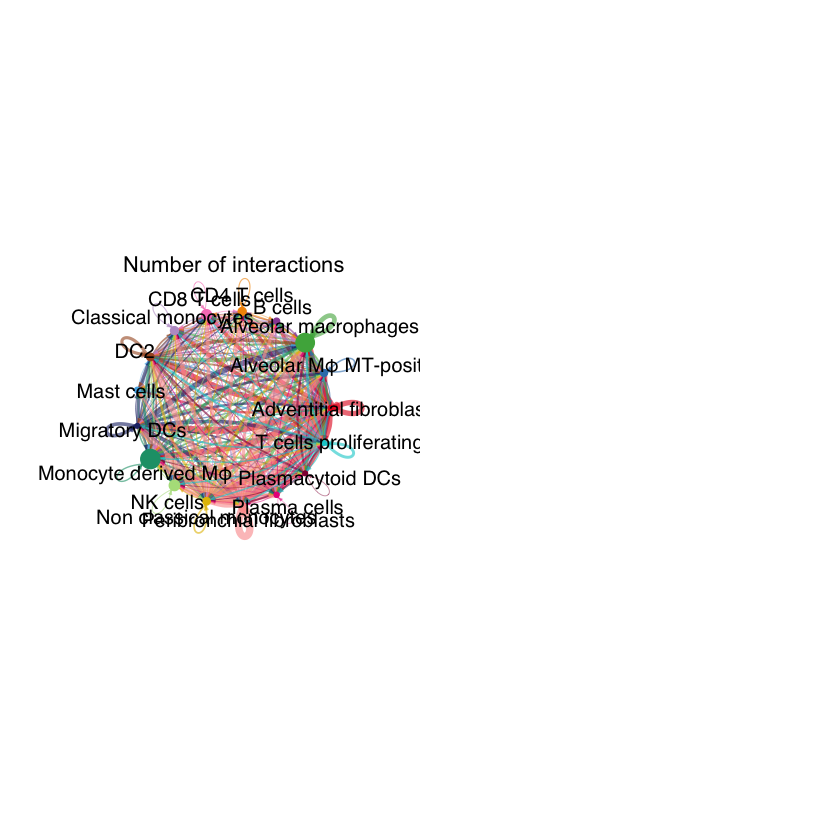

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

plot without title

In [9]:
nc_cc <- filterCommunication(nc_cc, min.cells = 1)
nc_cc <- computeCommunProbPathway(nc_cc)
nc_cc <- aggregateNet(nc_cc)

groupSize <- as.numeric(table(nc_cc@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(nc_cc@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(nc_cc@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

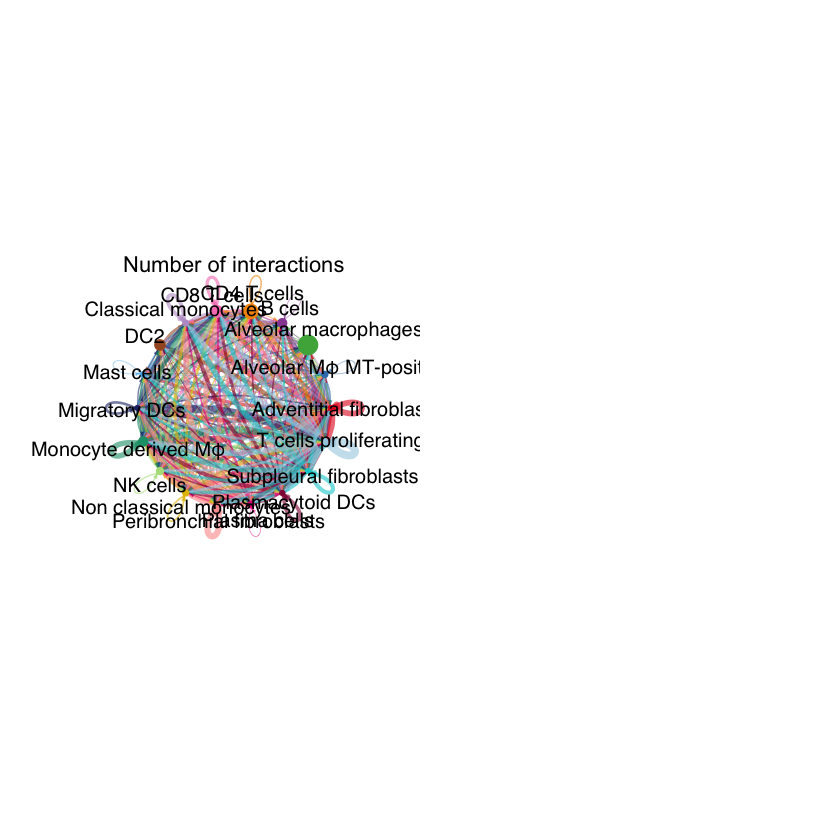

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

plot without title

In [10]:
adv_cc <- filterCommunication(adv_cc, min.cells = 1)
adv_cc <- computeCommunProbPathway(adv_cc)
adv_cc <- aggregateNet(adv_cc)

groupSize <- as.numeric(table(adv_cc@idents))
par(mfrow = c(1,2), xpd=TRUE)
netVisual_circle(adv_cc@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(adv_cc@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")

In [11]:
pdf(file = "adv_netVisual_chord_gene.pdf", width = 20, height = 20)

netVisual_chord_gene(adv_cc, 
  sources.use = lymphoid_cells, 
  targets.use = myeloid_cells, 
  slot.name = "netP", 
  lab.cex = 1.5,  
  small.gap = 3, 
  big.gap = 15,
  annotationTrackHeight = c(0.03),
  link.visible = TRUE,
  scale = FALSE,
  directional = 1,
  link.target.prop = TRUE,
  reduce = -1,
  transparency = 0.2,
  link.border = NA,
  title.name = "Advanced condition",
  legend.pos.x = 5,
  legend.pos.y = 10,
  show.legend = TRUE,
  thresh = 0.05
)

dev.off()

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

plot without title

null device 
          1

In [12]:
pdf(file = "early_netVisual_chord_gene.pdf", width = 20, height = 20)

netVisual_chord_gene(ear_cc, 
  sources.use = lymphoid_cells,
  targets.use = myeloid_cells, 
  slot.name = "netP", 
  lab.cex = 1.5,  
  small.gap = 3, 
  big.gap = 15,
  annotationTrackHeight = c(0.03),
  link.visible = TRUE,
  scale = FALSE,
  directional = 1,
  link.target.prop = TRUE,
  reduce = -1,
  transparency = 0.2,
  link.border = NA,
  title.name = "Early condition",
  legend.pos.x = 5,
  legend.pos.y = 10,
  show.legend = TRUE,
  thresh = 0.05
)

dev.off()

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

plot without title

null device 
          1

In [13]:
pdf(file = "noncancer_netVisual_chord_gene.pdf", width = 20, height = 20)

netVisual_chord_gene(nc_cc, 
  sources.use = lymphoid_cells,
  targets.use = myeloid_cells, 
  slot.name = "netP", 
  lab.cex = 1.5,  
  small.gap = 3, 
  big.gap = 15,
  annotationTrackHeight = c(0.03),
  link.visible = TRUE,
  scale = FALSE,
  directional = 1,
  link.target.prop = TRUE,
  reduce = -1,
  transparency = 0.2,
  link.border = NA,
  title.name = "Non-Cancer condition",
  legend.pos.x = 5,
  legend.pos.y = 10,
  show.legend = TRUE,
  thresh = 0.05
)

dev.off()

ERROR while rich displaying an object: Error in file(con, "rb"): cannot open the connection

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

plot without title

null device 
          1

In [14]:
pathways.show.all <- nc_cc@netP$pathways
levels(nc_cc@idents)
vertex.receiver = seq(1,4)
for (i in 1:length(pathways.show.all)) {
  netVisual(nc_cc, signaling = pathways.show.all[i], vertex.receiver = vertex.receiver, layout = "hierarchy")
  gg <- netAnalysis_contribution(nc_cc, signaling = pathways.show.all[i])
  ggsave(filename=paste0(pathways.show.all[i], "_L-R_contribution.pdf"), plot=gg, width = 3, height = 2, units = 'in', dpi = 300)
}

pathways.show.all <- ear_cc@netP$pathways
levels(ear_cc@idents)
vertex.receiver = seq(1,4)
for (i in 1:length(pathways.show.all)) {
  netVisual(ear_cc, signaling = pathways.show.all[i], vertex.receiver = vertex.receiver, layout = "hierarchy")
  gg <- netAnalysis_contribution(ear_cc, signaling = pathways.show.all[i])
  ggsave(filename=paste0(pathways.show.all[i], "_L-R_contribution.pdf"), plot=gg, width = 3, height = 2, units = 'in', dpi = 300)
}

pathways.show.all <- adv_cc@netP$pathways
levels(adv_cc@idents)
vertex.receiver = seq(1,4)
for (i in 1:length(pathways.show.all)) {
  netVisual(adv_cc, signaling = pathways.show.all[i], vertex.receiver = vertex.receiver, layout = "hierarchy")
  gg <- netAnalysis_contribution(adv_cc, signaling = pathways.show.all[i])
  ggsave(filename=paste0(pathways.show.all[i], "_L-R_contribution.pdf"), plot=gg, width = 3, height = 2, units = 'in', dpi = 300)
}

[1] "Adventitial fibroblasts"   "Alveolar M<U+03C6> MT-positive"
 [3] "Alveolar macrophages"      "B cells"                  
 [5] "CD4 T cells"               "CD8 T cells"              
 [7] "Classical monocytes"       "DC2"                      
 [9] "Mast cells"                "Migratory DCs"            
[11] "Monocyte derived M<U+03C6>" "NK cells"                 
[13] "Non classical monocytes"   "Peribronchial fibroblasts"
[15] "Plasma cells"              "Plasmacytoid DCs"         
[17] "T cells proliferating"

[1] "Adventitial fibroblasts"   "Alveolar M<U+03C6> MT-positive"
 [3] "Alveolar macrophages"      "B cells"                  
 [5] "CD4 T cells"               "CD8 T cells"              
 [7] "Classical monocytes"       "DC2"                      
 [9] "Mast cells"                "Migratory DCs"            
[11] "Monocyte derived M<U+03C6>" "NK cells"                 
[13] "Non classical monocytes"   "Peribronchial fibroblasts"
[15] "Plasma cells"              "Plasmacytoid DCs"         
[17] "Subpleural fibroblasts"    "T cells proliferating"

[1] "Adventitial fibroblasts"   "Alveolar M<U+03C6> MT-positive"
 [3] "Alveolar macrophages"      "B cells"                  
 [5] "CD4 T cells"               "CD8 T cells"              
 [7] "Classical monocytes"       "DC2"                      
 [9] "Mast cells"                "Migratory DCs"            
[11] "Monocyte derived M<U+03C6>" "NK cells"                 
[13] "Non classical monocytes"   "Peribronchial fibroblasts"
[15] "Plasma cells"              "Plasmacytoid DCs"         
[17] "Subpleural fibroblasts"    "T cells proliferating"

In [15]:
pdf(file ="noncancer_netVisual_bubble_tmyeloid.pdf", width = 10, height =10)

netVisual_bubble(
  object = nc_cc,
  sources.use = c('CD4 T cells', 'CD8 T cells', 'T cells proliferating'),
  targets.use = myeloid_cells,
  remove.isolate = FALSE,
  thresh = 0.01,
  grid.on = FALSE,
  font.size = 16,
  font.size.title = 20,
  show.legend = TRUE,
  angle.x = 90
)

dev.off()

Comparing communications on a single object 




pdf 
  2

In [16]:
pdf(file ="noncancer_netVisual_bubble_fibroblastmyleloid.pdf", width = 10, height =10)

netVisual_bubble(
  object = nc_cc,
  sources.use = c('CD4 T cells', 'CD8 T cells', 'T cells proliferating'),
  targets.use = fibroblast_cells,
  remove.isolate = FALSE,
  thresh = 0.05,
  grid.on = FALSE,
  font.size = 16,
  font.size.title = 20,
  show.legend = TRUE,
  angle.x = 90
)

dev.off()

Comparing communications on a single object 




pdf 
  2

In [17]:
pdf(file ="early_netVisual_bubble_tmyeloid.pdf", width = 10, height =10)

netVisual_bubble(
  object = ear_cc,
  sources.use = c('CD4 T cells', 'CD8 T cells', 'T cells proliferating'),
  targets.use = myeloid_cells,
  remove.isolate = FALSE,
  thresh = 0.01,
  grid.on = FALSE,
  font.size = 16,
  font.size.title = 20,
  show.legend = TRUE,
  angle.x = 90
)

dev.off()

Comparing communications on a single object 




pdf 
  2

In [18]:
pdf(file ="early_netVisual_bubble_fibroblastmyleloid.pdf", width = 10, height =10)

netVisual_bubble(
  object = ear_cc,
  sources.use = c('CD4 T cells', 'CD8 T cells', 'T cells proliferating'),
  targets.use = fibroblast_cells,
  remove.isolate = FALSE,
  thresh = 0.05,
  grid.on = FALSE,
  font.size = 16,
  font.size.title = 20,
  show.legend = TRUE,
  angle.x = 90
)

dev.off()

Comparing communications on a single object 




pdf 
  2

In [19]:
pdf(file ="adv_netVisual_bubble_tmyeloid.pdf", width = 10, height =10)

netVisual_bubble(
  object = adv_cc,
  sources.use = c('CD4 T cells', 'CD8 T cells', 'T cells proliferating'),
  targets.use = myeloid_cells,
  remove.isolate = FALSE,
  thresh = 0.01,
  grid.on = FALSE,
  font.size = 16,
  font.size.title = 20,
  show.legend = TRUE,
  angle.x = 90
)

dev.off()

Comparing communications on a single object 




pdf 
  2

In [20]:
pdf(file ="adv_netVisual_bubble_fibroblastmyleloid.pdf", width = 10, height =10)

netVisual_bubble(
  object = adv_cc,
  sources.use = c('CD4 T cells', 'CD8 T cells', 'T cells proliferating'),
  targets.use = fibroblast_cells,
  remove.isolate = FALSE,
  thresh = 0.05,
  grid.on = FALSE,
  font.size = 16,
  font.size.title = 20,
  show.legend = TRUE,
  angle.x = 90
)

dev.off()

Comparing communications on a single object 




pdf 
  2

In [ ]:
library(ggplot2)
library(ComplexHeatmap)

nc_cc <- netAnalysis_computeCentrality(nc_cc, slot.name = "netP") 

pdf(file ="nc_netAnalysis_signalingRole_outgoing_heatmap.pdf", width = 10, height =10)

ht1 <- netAnalysis_signalingRole_heatmap(nc_cc, pattern = "outgoing", width = 17, height = 17, font.size = 7 )
draw(ht1)

dev.off()

pdf(file ="nc_netAnalysis_signalingRole_incoming_heatmap.pdf", width = 10, height =10)

ht2 <- netAnalysis_signalingRole_heatmap(nc_cc, pattern = "incoming", width = 17, height = 17, font.size = 7 )
draw(ht2)

dev.off()


pdf 
  2

pdf 
  2

In [ ]:
ear_cc <- netAnalysis_computeCentrality(ear_cc, slot.name = "netP") 

pdf(file ="ear_netAnalysis_signalingRole_outgoing_heatmap.pdf", width = 10, height =10)

ht1 <- netAnalysis_signalingRole_heatmap(ear_cc, pattern = "outgoing", width = 17, height = 17, font.size = 7 )
draw(ht1)

dev.off()

pdf(file ="ear_netAnalysis_signalingRole_incoming_heatmap.pdf", width = 10, height =10)

ht2 <- netAnalysis_signalingRole_heatmap(ear_cc, pattern = "incoming", width = 17, height = 17, font.size = 7 )
draw(ht2)

dev.off()

pdf 
  2

pdf 
  2

In [ ]:
adv_cc <- netAnalysis_computeCentrality(adv_cc, slot.name = "netP") 

pdf(file ="adv_netAnalysis_signalingRole_outgoing_heatmap.pdf", width = 10, height =10)

ht1 <- netAnalysis_signalingRole_heatmap(adv_cc, pattern = "outgoing", width = 17, height = 17, font.size = 7 )
draw(ht1)

dev.off()

pdf(file ="adv_netAnalysis_signalingRole_incoming_heatmap.pdf", width = 10, height =10)

ht2 <- netAnalysis_signalingRole_heatmap(adv_cc, pattern = "incoming", width = 17, height = 17, font.size = 7 )
draw(ht2)

dev.off()

pdf 
  2

pdf 
  2

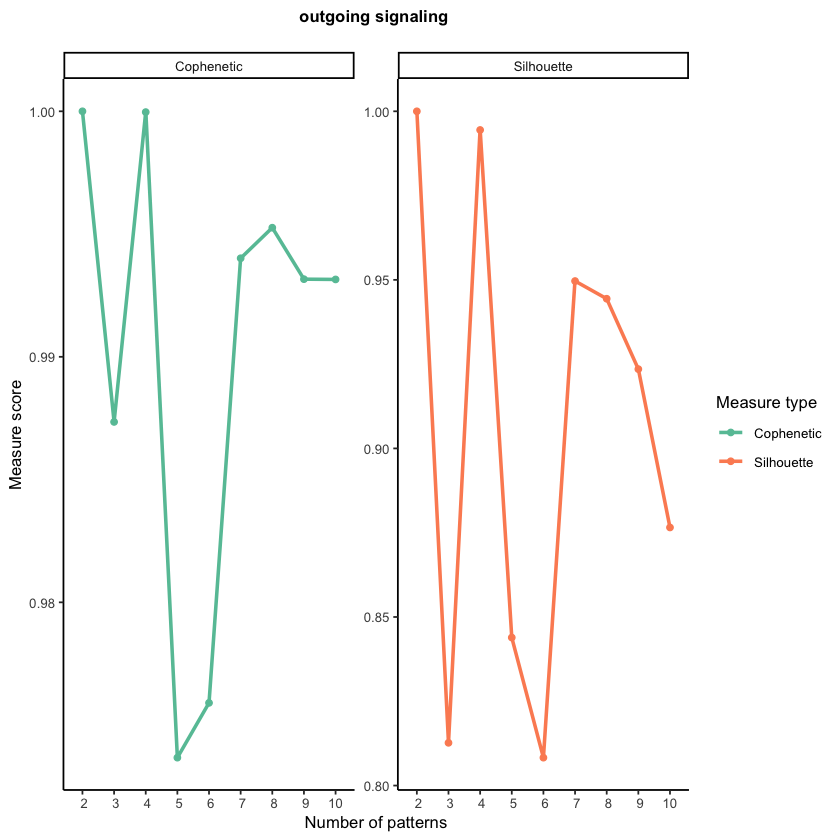

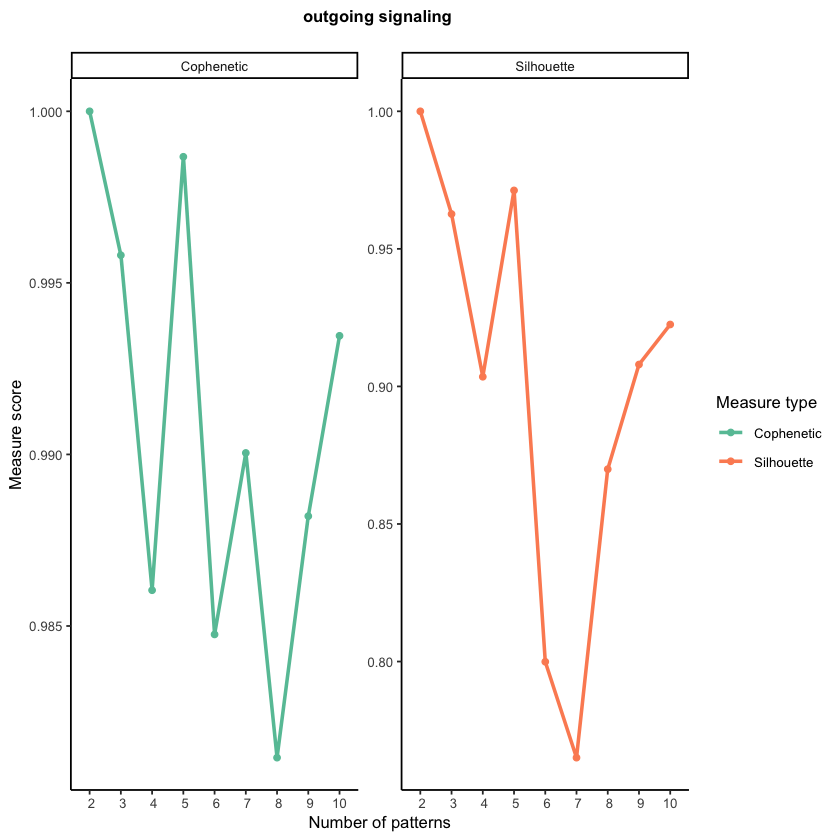

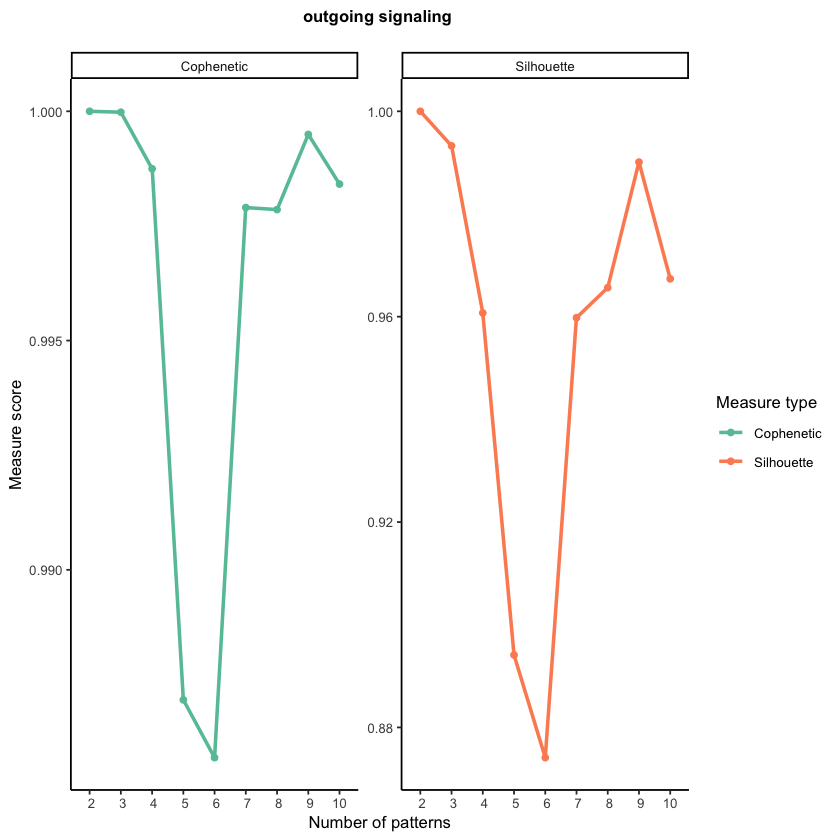

In [ ]:
selectK(nc_cc, pattern = "outgoing")
selectK(ear_cc, pattern = "outgoing")
selectK(adv_cc, pattern = "outgoing")
nPatterns = 6

In [ ]:
pdf(file ="nc_identifyCommunicationPatterns.pdf", width = 10, height =10)

nc_cc <- identifyCommunicationPatterns(nc_cc, pattern = "outgoing", k = nPatterns, height = 15, width = 3, font.size = 7)

dev.off()

pdf 
  2

In [ ]:
pdf(file ="ear_identifyCommunicationPatterns.pdf", width = 10, height =10)

ear_cc <- identifyCommunicationPatterns(ear_cc, pattern = "outgoing", k = nPatterns, height = 15, width = 3, font.size = 7)

dev.off()

pdf 
  2

In [ ]:
pdf(file ="adv_identifyCommunicationPatterns.pdf", width = 10, height =10)

adv_cc <- identifyCommunicationPatterns(adv_cc, pattern = "outgoing", k = nPatterns, height = 15, width = 3, font.size = 7)

dev.off()

pdf 
  2

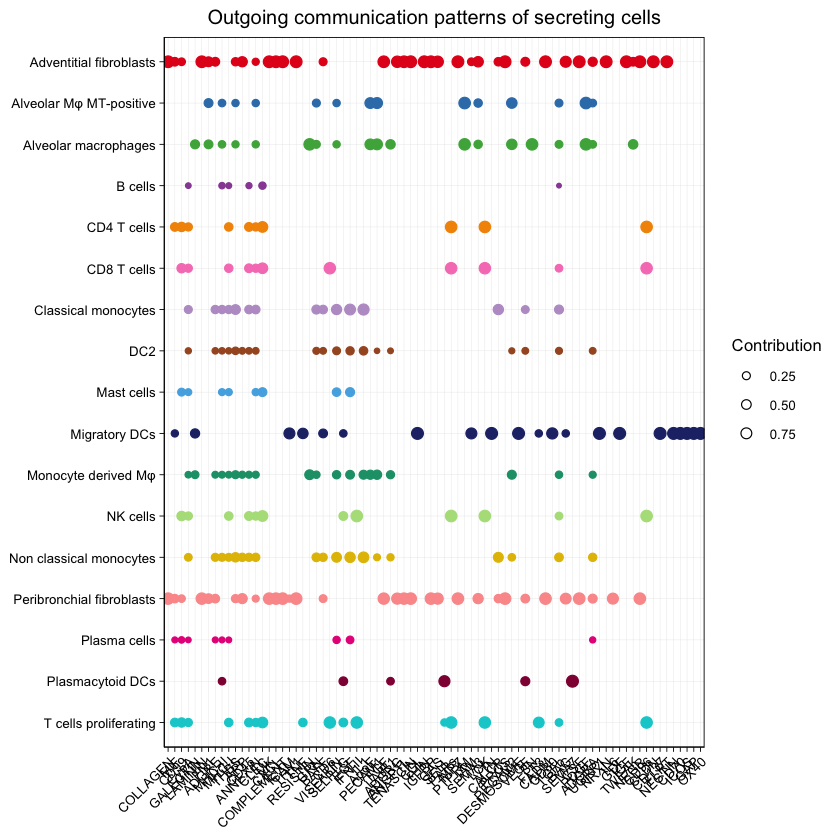

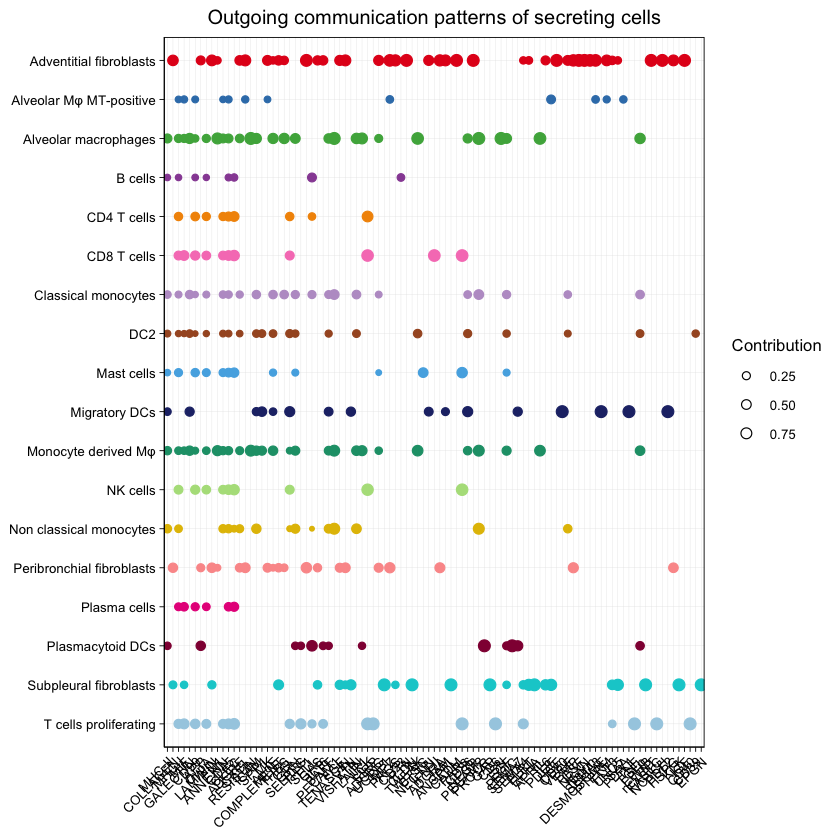

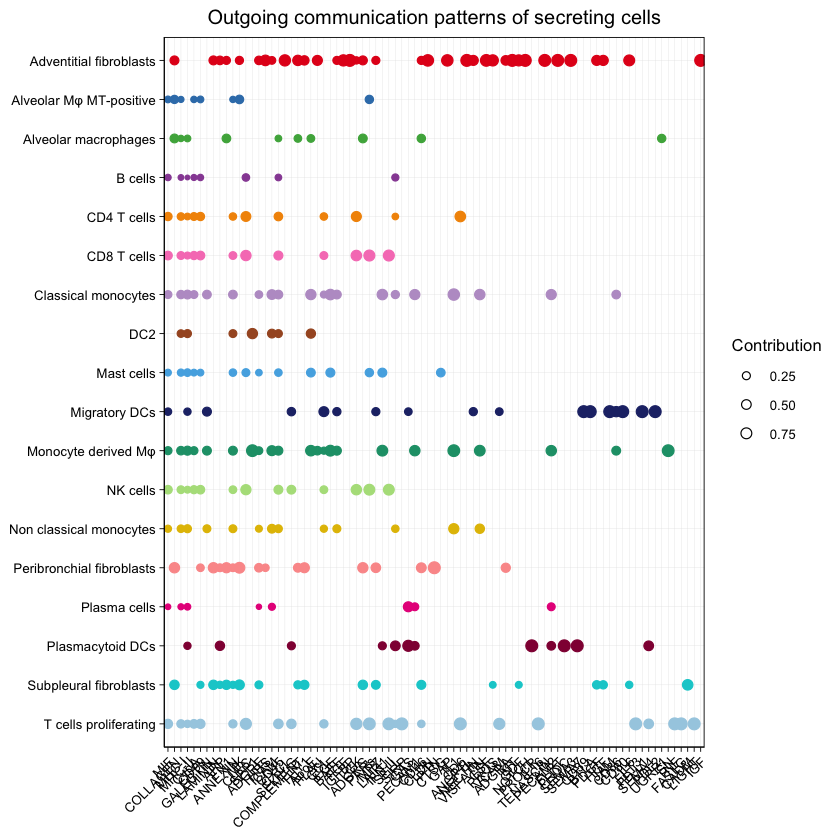

In [ ]:
netAnalysis_dot(nc_cc, pattern = "outgoing")
netAnalysis_dot(ear_cc, pattern = "outgoing")
netAnalysis_dot(adv_cc, pattern = "outgoing")